### Introduction to Neural Network Regression in Tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-02-24 23:24:10.053009: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X=tf.range(-100,100,4)
y= 3*X-17
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-317, -305, -293, -281, -269, -257, -245, -233, -221, -209, -197,
        -185, -173, -161, -149, -137, -125, -113, -101,  -89,  -77,  -65,
         -53,  -41,  -29,  -17,   -5,    7,   19,   31,   43,   55,   67,
          79,   91,  103,  115,  127,  139,  151,  163,  175,  187,  199,
         211,  223,  235,  247,  259,  271], dtype=int32)>)

In [3]:
def train_test_split(X,y,train_percent=0.7,valid_percent=0.15,details=False,shuffle=True,seed=14):
    if shuffle:
        tf.random.set_seed(seed)
        indices = tf.random.shuffle(tf.range(tf.shape(X)[0]))
        X = tf.gather(X, indices)
        y = tf.gather(y, indices)

    # train-test split:
    X_Train=X[:int(train_percent*len(X))]
    X_test=X[int(train_percent*len(X)):]
    y_Train=y[:int(train_percent*len(y))]
    y_test=y[int(train_percent*len(y)):]

    # train-valid split:
    X_train=X_Train[int(valid_percent*len(X_Train)):]
    X_valid=X_Train[:int(valid_percent*len(X_Train))]
    y_train=y_Train[int(valid_percent*len(y_Train)):]
    y_valid=y_Train[:int(valid_percent*len(y_Train))]

    # printing details:
    if details:
        print(f"Training data shape:{X_train.shape}")
        print(f"Training label shape:{y_train.shape}")
        print(f"Validation label shape:{y_valid.shape}")
        print(f"Validation data shape:{X_valid.shape}")
        print(f"Testing data shape:{X_test.shape}")
        print(f"Testing label shape:{y_test.shape}")

    return X_train,X_valid,X_test,y_train,y_valid,y_test


# splitting data into train and test
X_train,X_valid,X_test,y_train,y_valid,y_test=train_test_split(X,y,details=True,train_percent=0.8,valid_percent=0.0)

Training data shape:(40,)
Training label shape:(40,)
Validation label shape:(0,)
Validation data shape:(0,)
Testing data shape:(10,)
Testing label shape:(10,)


In [4]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([  96,  -96,    0,   20,   56,   24,   28,  -44,  -92,  -24,    4,
         -56,   60,  -80,  -68,   32,   -8,   88,   48,   72,  -52, -100,
          80,   16,   40,  -84,  -28,   84,  -64,  -48,   92,  -16,  -72,
         -36,    8,   12,   76,  -88,   -4,   36], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([ 271, -305,  -17,   43,  151,   55,   67, -149, -293,  -89,   -5,
        -185,  163, -257, -221,   79,  -41,  247,  127,  199, -173, -317,
         223,   31,  103, -269, -101,  235, -209, -161,  259,  -65, -233,
        -125,    7,   19,  211, -281,  -29,   91], dtype=int32)>)

In [44]:
# setting the random seed
tf.random.set_seed(42)

# 1. creating model using sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation='leaky_relu',name='hidden_layer_1'),
    tf.keras.layers.Dense(5,activation='leaky_relu',name='hidden_layer_2'),
    tf.keras.layers.Dense(1,name='output_layer')
],name="My_first_model")

# 2. compile the model
model.compile(loss=tf.keras.losses.mse,optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),metrics=["mse"])

# 3. fitting the model
model.fit(tf.expand_dims(X_train,-1),y_train, epochs=50)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 36230.6523 - mse: 36230.6523 
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 28555.0859 - mse: 28555.0859
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20343.9668 - mse: 20343.9668
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11646.3037 - mse: 11646.3037
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9396.2148 - mse: 9396.2148
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12832.5596 - mse: 12832.5596
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6604.8101 - mse: 6604.8101
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1481.2675 - mse: 1481.2675
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 300.3272 - mse: 300.3272
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1676.5042 - mse: 1676.5042
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2026.6445 - mse: 2026.6445
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1015.43

In [46]:
model.summary()

Model: "My_first_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140 (564.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 94 (380.00 B)

**9. Visualizing model predictions**

* To visualize predictions, it's a good idea to plot them against ground truth labels

In [6]:
y_pred=model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[ -44.474834],
       [ 119.92117 ],
       [ 142.2331  ],
       [ -70.028305],
       [-108.358505],
       [-133.91197 ],
       [-197.79564 ],
       [ 186.85695 ],
       [ 175.70097 ],
       [-248.90257 ]], dtype=float32)

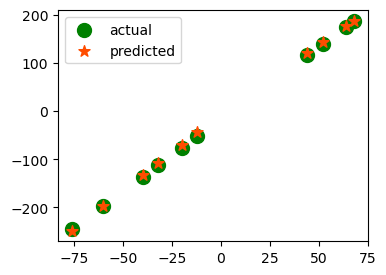

In [93]:
def plot_preds(x_test,y_test,y_pred,figsize=(10,7)):
    plt.figure(figsize=figsize)
    plt.scatter(x_test,y_test,color='g',s=100,label='actual')
    plt.scatter(x_test,y_pred,color=(1.0,0.3,0.0,1.0),s=70,marker='*',label='predicted')
    plt.legend()
    plt.show()

plot_preds(X_test,y_test,y_pred,figsize=(4,3))


**10) Evaluating model's prediction in regression**

Common metrics for regression:
* Mean Absolute Error (great starter metric for regression problems)
  * `tf.losses.MAE()` or `tf.metrics.MAE()` (squeeze if dimensions are not same)
* Mean Square Error (used when large errors are more significant than small errors)
  * `tf.losses.MSE()` or `tf.metrics.MSE()` (squeeze if dimensions are not same)
* Huber (combination of MAE and MSE, less sensitive to outliers compared to MSE)
  * `tf.losses.huber()` or `tf.metrics.huber()` (squeeze if dimensions are not same)

In [8]:
# evaluating using current metric set while compiling model
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 20.3408 - mse: 20.3408


[20.3408145904541, 20.3408145904541]

In [9]:
# calculating MAE:
tf.losses.MAE(y_test,tf.squeeze(y_pred))
tf.metrics.MAE(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.692288637161255>

In [10]:
# calculating MSE:
tf.losses.MSE(y_test,tf.squeeze(y_pred))
tf.metrics.MSE(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=20.3408145904541>

In [11]:
# calculating Huber:
tf.losses.huber(y_test,tf.squeeze(y_pred))
tf.metrics.huber(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.235565662384033>

**Note:**
* One of our main goals should be to minimize the time between our experiments. The more experiments you do, more things we will figure out which don't work and in turn, get closer to what does work. Machine Learning Practioner's Motto: `Experiment-Experiment-Experiment`
* Track the results of your experiment
    * tensorboard- component of tensorflow library to track modelling experiments
    * Weights & Biases - plugs straight into tensorboard

**11) Saving and loading a model**

There are three main formats to save models:
* The SavedModel format (default) : `model.export(filepath='folder/dir')`
* The HDF5 format or keras format : `model.save()`

In [35]:
import os
cwd=os.getcwd()
save_path=os.path.join(cwd,"saved_model")
model.export(filepath=save_path)

INFO:tensorflow:Assets written to: /home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/2_neural_network_regression/saved_model/assets


INFO:tensorflow:Assets written to: /home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/2_neural_network_regression/saved_model/assets


Saved artifact at '/home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/2_neural_network_regression/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137056941296800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137056939989952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137056939997872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137056928926000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137056939985552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137056928927584: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [36]:
# saving model in hdf5 format
model.save('model.h5')

In [102]:
# saving model in keras format
model.save('model.keras')

/home/rudraksha14/.local/lib/python3.10/site-packages/keras/src/saving/saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


['serve', 'serving_default']
{'output_0': TensorSpec(shape=(None, 1), dtype=tf.float32, name='output_0')}


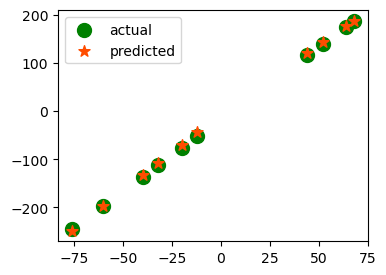

In [103]:
# loading the SavedModel format
smf_model=tf.saved_model.load(save_path)
print(list(smf_model.signatures.keys()))  # ["serving_default"]
infer = smf_model.signatures["serving_default"]
print(infer.structured_outputs)
output=infer(tf.expand_dims(tf.cast(X_test,tf.float32),-1))
plot_preds(X_test,y_test,output['output_0'],figsize=(4,3))


In [107]:
# loading HDF5 format
h5_model=tf.keras.models.load_model('model.h5')
h5_model.summary()

Model: "My_first_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48 (196.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


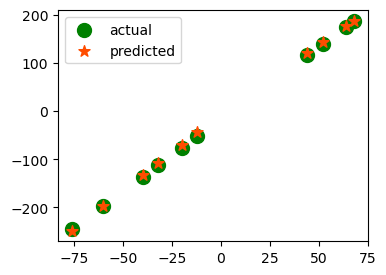

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [108]:
plot_preds(X_test,y_test,h5_model.predict(X_test),figsize=(4,3))
output['output_0']==h5_model.predict(X_test)

In [109]:
# loading keras format
keras_model=tf.keras.models.load_model('model.keras')
keras_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tfsm_layer_6 (TFSMLayer)        │ ?                      │            46 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46 (184.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

**Note:** Prefer the HDF5 format

***-- CONTD IN NEXT NOTEBOOK --***